<a href="https://colab.research.google.com/github/anirudhmittal2019/Celebrity-Search-Application/blob/main/Learning_Agency_Lab_Automated_Essay_Scoring%202.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'learning-agency-lab-automated-essay-scoring-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71485%2F8059942%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240610%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240610T040555Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4930f5e1f05e865a7f2d865dbe8b16507cbbf2347675a86865626af83337350fe50aa398812b993e6ce744d233325604eee8830e3b192ea3f8af968626b7828ed0febbfccc2cee9a1830e767c0cf4c0457a7692e6876c9c6898c452aaeb7b5d4b018aa69f6ce0fdfce2a8fecea5474b23c99fca452b9caa038d2cf6aba059712dea14828f79e93eeaef3b1a448bbfeffebf62abd276ab56328899730a7879d67e8f1cd00434c319c7789d3858632f41b2cc6a4ddef6ad473b17968b3f3aa98fe58a56cfac4e7dbf935aebced34f6e7b2f713324a2ad9d1d9913546094a415036d98baed91aa785b1930bc9e1bf325a83f2d2be42fc8759fc0845110ac7e3baaa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12464821 bytes downloaded
Downloaded and uncompressed: learning-agency-lab-automated-essay-scoring-2
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv


In [3]:
train=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
test=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')
sample=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv')

In [4]:
train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('essay_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('full_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['full_text'].value_counts()
    for x_label, grp in _df_4.groupby('essay_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('essay_id')
_ = plt.ylabel('full_text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['essay_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='score', y='essay_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['full_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='score', y='full_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
train['full_text'][0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


In [6]:
train.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


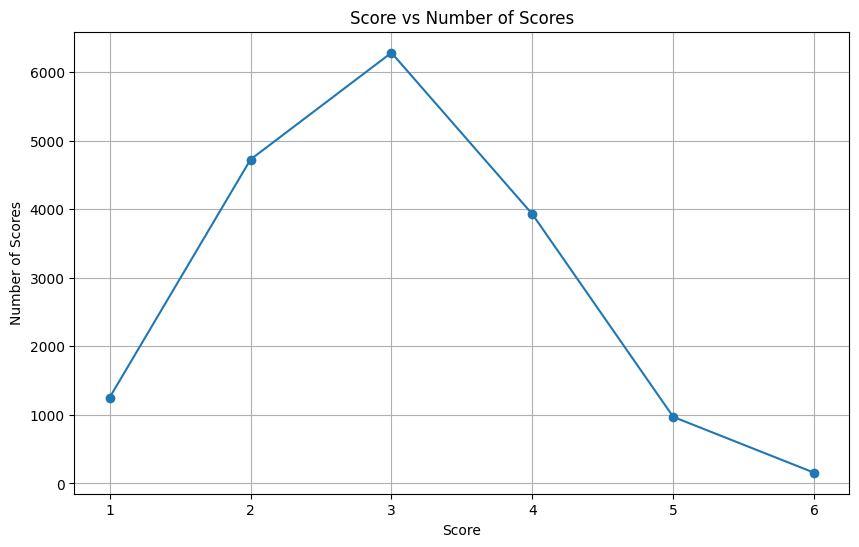

In [9]:
import matplotlib.pyplot as plt
score_counts=train['score'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(score_counts.index, score_counts.values, marker='o', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Number of Scores')
plt.title('Score vs Number of Scores')
plt.grid(True)
plt.show()

In [10]:
score_counts

score
1    1252
2    4723
3    6280
4    3926
5     970
6     156
Name: count, dtype: int64

In [ ]:
sample.head()

,essay_id,score
0,000d118,3
1,000fe60,3
2,001ab80,4


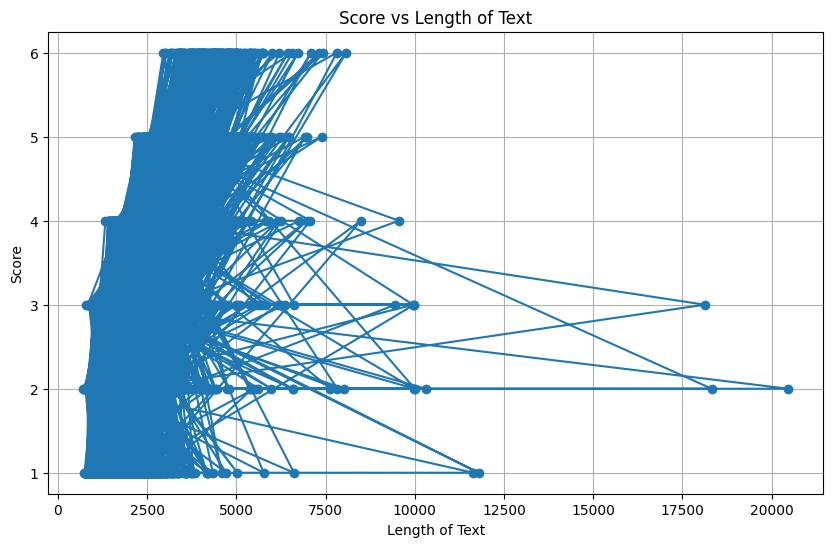

In [19]:
len_text=train['full_text'].apply(len)
plt.figure(figsize=(10,6))
plt.plot(len_text, train['score'], marker='o', linestyle='-')
plt.xlabel('Length of Text')
plt.ylabel('Score')
plt.title('Score vs Length of Text')
plt.grid(True)
plt.show()

In [21]:
!pip install --upgrade keras-nlp
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 42.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      S

In [22]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # Or "jax" or "torch"!

import keras_nlp
import tensorflow_datasets as tfds


In [25]:
train.head()

,full_text,score
0,Many people have car where they live. The thin...,3
1,I am a scientist at NASA that is discussing th...,3
2,People always wish they had the same technolog...,4
3,"We all heard about Venus, the planet without a...",4
4,"Dear, State Senator\n\nThis is a letter to arg...",3


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and validation sets
train_texts, val_texts, train_scores, val_scores = train_test_split(train['full_text'], train['score'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad the sequences
max_length = 20
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1)  # Regression task, no activation for the output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
# Train the model
history = model.fit(
    train_padded,
    train_scores,
    epochs=1000,
    validation_data=(val_padded, val_scores),
    verbose=2
)


Epoch 1/1000
433/433 - 1s - 2ms/step - loss: 0.6882 - mae: 0.6527 - val_loss: 0.9790 - val_mae: 0.7887
Epoch 2/1000
433/433 - 1s - 2ms/step - loss: 0.6700 - mae: 0.6426 - val_loss: 0.9941 - val_mae: 0.7945
Epoch 3/1000
433/433 - 1s - 2ms/step - loss: 0.6556 - mae: 0.6336 - val_loss: 1.0051 - val_mae: 0.7979
Epoch 4/1000
433/433 - 1s - 2ms/step - loss: 0.6424 - mae: 0.6258 - val_loss: 1.0225 - val_mae: 0.8055
Epoch 5/1000
433/433 - 2s - 4ms/step - loss: 0.6306 - mae: 0.6191 - val_loss: 1.0386 - val_mae: 0.8107
Epoch 6/1000
433/433 - 1s - 3ms/step - loss: 0.6202 - mae: 0.6125 - val_loss: 1.0453 - val_mae: 0.8119
Epoch 7/1000
433/433 - 1s - 2ms/step - loss: 0.6104 - mae: 0.6050 - val_loss: 1.0592 - val_mae: 0.8173
Epoch 8/1000
433/433 - 1s - 2ms/step - loss: 0.6018 - mae: 0.5995 - val_loss: 1.0745 - val_mae: 0.8230
Epoch 9/1000
433/433 - 1s - 3ms/step - loss: 0.5948 - mae: 0.5951 - val_loss: 1.0894 - val_mae: 0.8281
Epoch 10/1000
433/433 - 1s - 3ms/step - loss: 0.5875 - mae: 0.5897 - val_

In [34]:
# Evaluate the model
loss, mae = model.evaluate(val_padded, val_scores, verbose=2)
print(f'Mean Absolute Error on validation set: {mae}')

109/109 - 0s - 1ms/step - loss: 3.9671 - mae: 1.5403
Mean Absolute Error on validation set: 1.540258765220642


In [35]:
test_sequences = tokenizer.texts_to_sequences(test['full_text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [36]:
# Make predictions on the test data
predictions = model.predict(test_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [37]:
# Create a DataFrame with essay_id and the predicted scores
submission_df = pd.DataFrame({
    'essay_id': test['essay_id'],
    'score': predictions.flatten()
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
